In [2]:
from fleck import generate_spots, Star
import sys
sys.path.insert(0, "../")

from michael import janet
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook')
from scipy import ndimage

2022-10-09 16:46:45.539269: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Hi there. Welcome to the good place.


In [3]:
np.random.seed(802)
N = 250
spot_contrast = np.random.uniform(0.5, 1., size=N)
rotation_period = np.random.uniform(1.5, 27., size=N)
u_ld = [0.5, 0.2]

spot_radius = np.random.uniform(0.05, 0.15, size=N)
min_latitude = np.random.uniform(30, 60, size=N)
max_latitude = np.random.uniform(61, 85, size=N)

t = np.arange(0, 27., 0.02)
yerr = np.random.normal(800, 1500, size=N)*1e-6

n_phases = len(t)
n_inclinations = 1
n_spots = np.random.uniform(10, 30, size=N).astype(int)

In [4]:
np.random.seed(802)

sim = np.zeros((N, len(t)))
obs = np.zeros((N, len(t)))

for idx in range(N):
    lons, lats, radii, inc_stellar = generate_spots(min_latitude[idx], max_latitude[idx],
                                                   spot_radius[idx], n_spots[idx],
                                                   n_inclinations=n_inclinations)
    star = Star(spot_contrast = spot_contrast[idx], n_phases=n_phases, 
                u_ld = u_ld, rotation_period = rotation_period[idx])
    lc = star.light_curve(lons, lats, radii, inc_stellar, times=t)
    
    lc -= np.mean(lc)
    lc += 1.
    
    sim[idx, :] = lc.flatten()
    obs[idx, :] = lc.flatten() + yerr[idx] * np.random.randn(len(t))

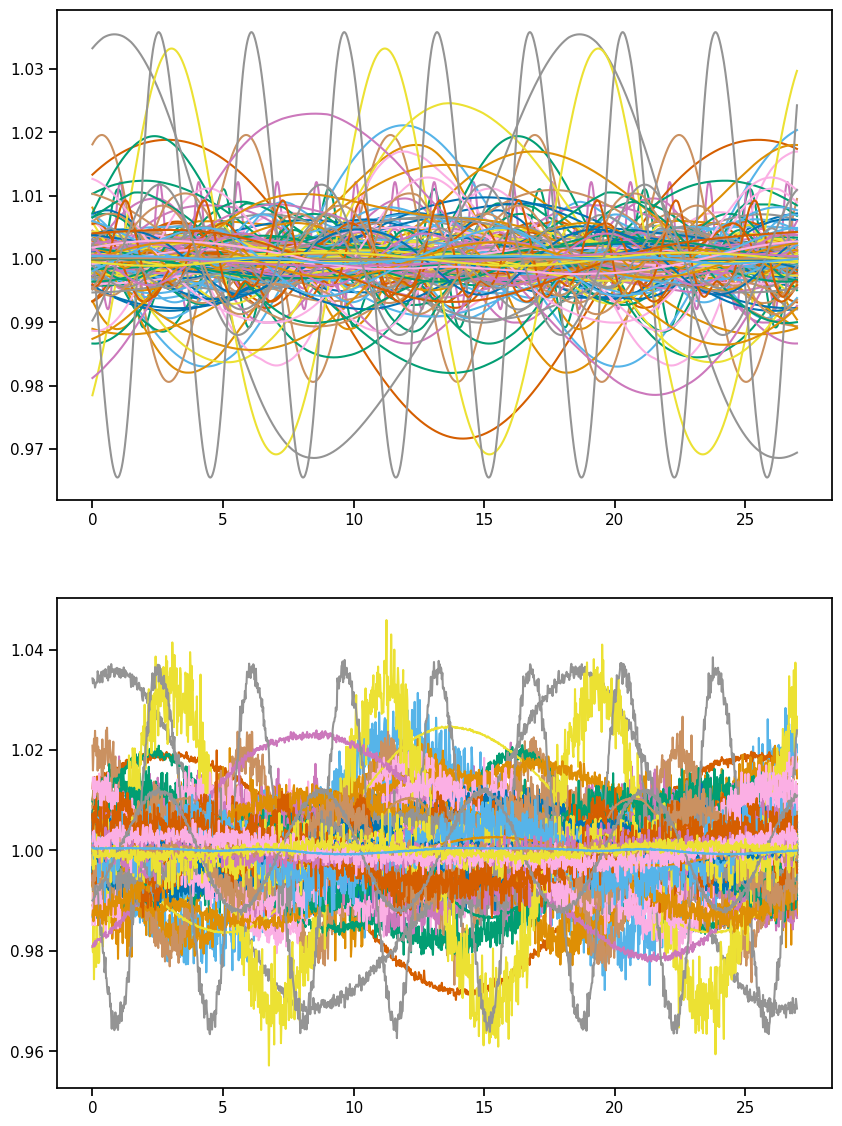

In [6]:
fig, ax = plt.subplots(2, 1, figsize=(10, 14))
ax[0].plot(t, sim.T)
ax[1].plot(t, obs.T)
plt.show()

In [9]:
stds = np.std(obs.T,axis=0)

In [52]:
a = obs[np.argmin(stds)]
at = sim[np.argmin(stds)]
ap = rotation_period[np.argmin(stds)]
b = obs[np.argmax(stds)]
bt = sim[np.argmax(stds)]
bp = rotation_period[np.argmax(stds)]

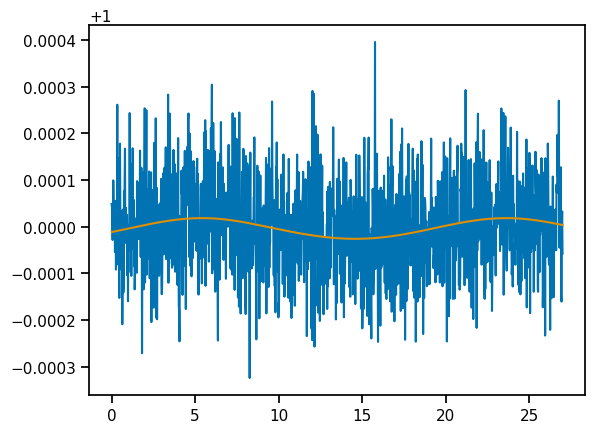

In [20]:
plt.plot(t, a)
plt.plot(t, at)

In [84]:
import lightkurve as lk
lc = lk.LightCurve(t, a).fold(period = ap)
lt = lk.LightCurve(t, at).fold(period = ap)
sd = np.sqrt(len(lc))
fsmoo = ndimage.gaussian_filter1d(lc.flux.value, sigma = sd, mode = 'nearest')
p2p = np.diff([np.nanmin(fsmoo), np.nanmax(fsmoo)])

/Users/Anaconda/anaconda3/envs/michael/lib/python3.10/site-packages/lightkurve/lightcurve.py:277: LightkurveDeprecationWarning: passing flux as a positional argument is deprecated, please use ``flux=...`` instead.
  warnings.warn(


In [86]:
std = np.std(lc.flux/fsmoo)
p2p > 2*np.std(lc.flux/fsmoo)

array([False])

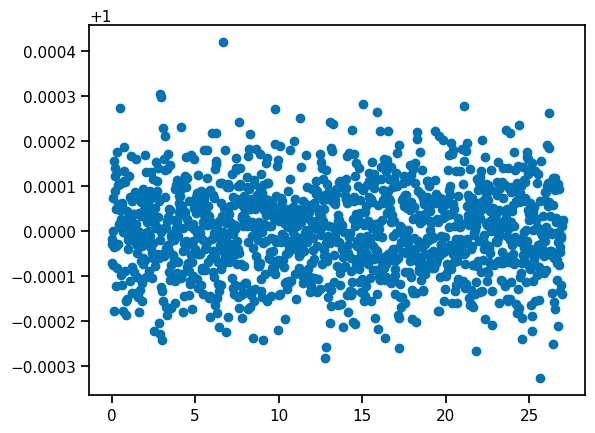

In [87]:
plt.scatter(t, lc.flux/fsmoo)

In [91]:
np.diff([p2p, 2*std])

/Users/Anaconda/anaconda3/envs/michael/lib/python3.10/site-packages/numpy/lib/function_base.py:1410: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  a = asanyarray(a)


array([<Quantity [0.00013812]>], dtype=object)

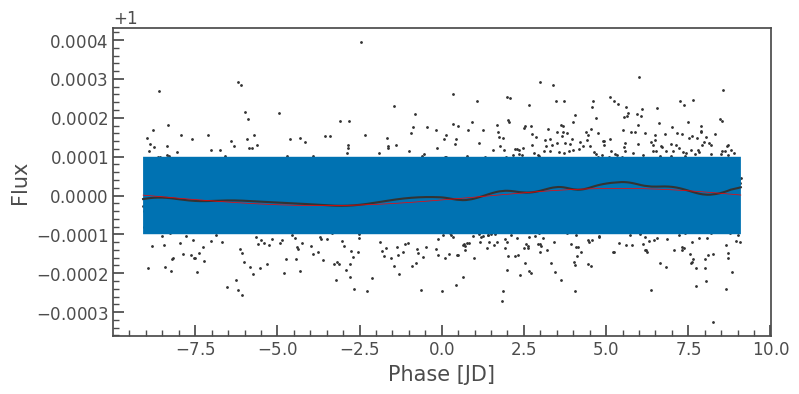

In [88]:
ax = lc.scatter()
ax.plot(lc.time.value, fsmoo)
lt.plot(ax=ax, c='r')
ax.fill_between(lc.time.value, 1-std, 1+std)

In [70]:
import lightkurve as lk
lc = lk.LightCurve(t, b).fold(period = bp)
lt = lk.LightCurve(t, bt).fold(period = bp)
sd = np.sqrt(len(lc))
fsmoo = ndimage.gaussian_filter1d(lc.flux.value, sigma = sd, mode = 'nearest')
p2p = np.diff([np.nanmin(fsmoo), np.nanmax(fsmoo)])

/Users/Anaconda/anaconda3/envs/michael/lib/python3.10/site-packages/lightkurve/lightcurve.py:277: LightkurveDeprecationWarning: passing flux as a positional argument is deprecated, please use ``flux=...`` instead.
  warnings.warn(


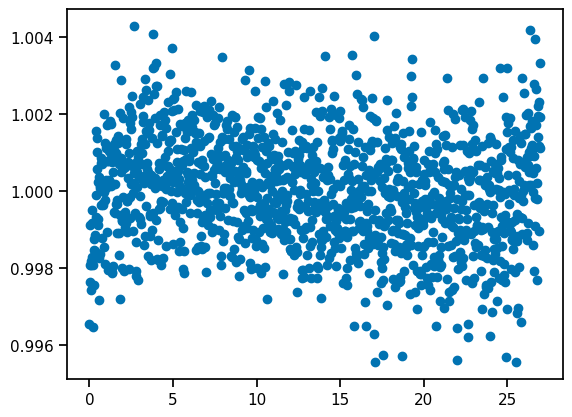

In [75]:
plt.scatter(t, lc.flux/fsmoo)

In [71]:
std = np.std(lc.flux/fsmoo)
p2p > std

array([ True])

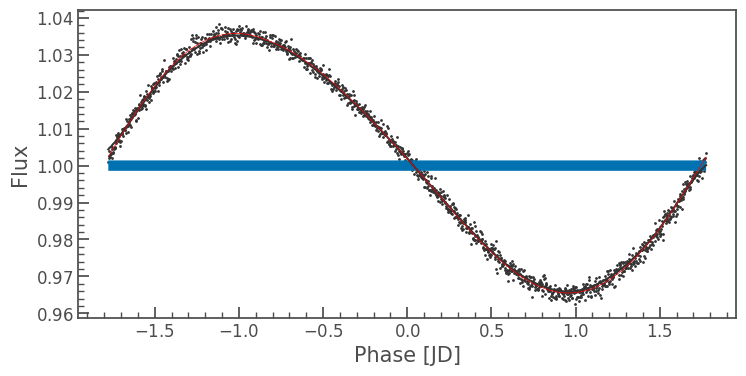

In [74]:
ax = lc.scatter()
ax.plot(lc.time.value, fsmoo)
lt.plot(ax=ax, c='r')
ax.fill_between(lc.time.value, 1-std, 1+std)

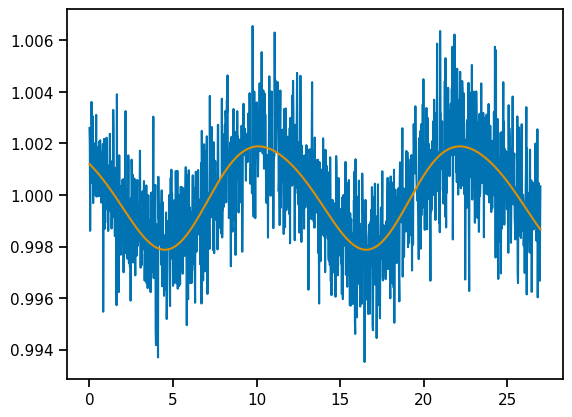

/Users/Anaconda/anaconda3/envs/michael/lib/python3.10/site-packages/lightkurve/lightcurve.py:277: LightkurveDeprecationWarning: passing flux as a positional argument is deprecated, please use ``flux=...`` instead.
  warnings.warn(


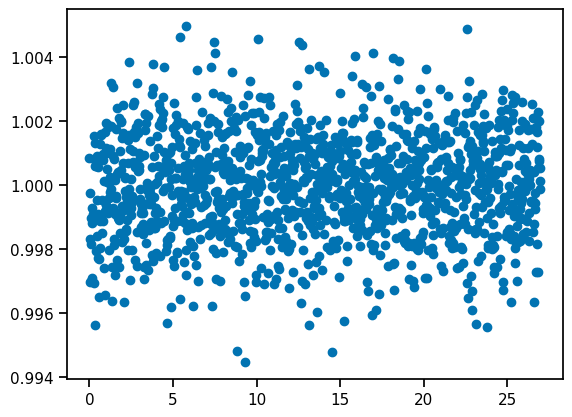

/Users/Anaconda/anaconda3/envs/michael/lib/python3.10/site-packages/numpy/lib/function_base.py:1410: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  a = asanyarray(a)


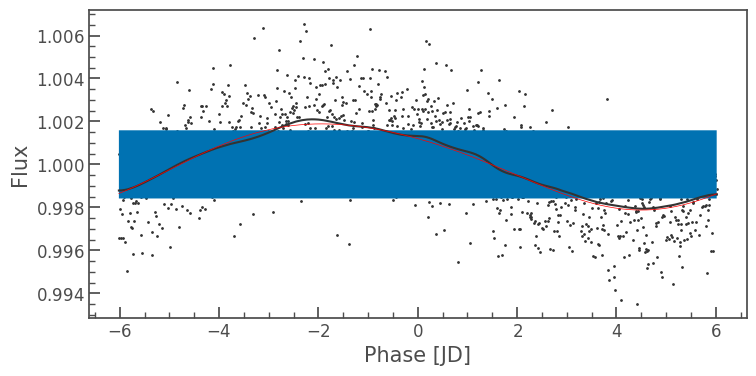

In [102]:
idx = 210
a = obs[idx]
at = sim[idx]
ap = rotation_period[idx]


plt.plot(t, a)
plt.plot(t, at)

plt.show()
import lightkurve as lk
lc = lk.LightCurve(t, a).fold(period = ap)
lt = lk.LightCurve(t, at).fold(period = ap)
sd = np.sqrt(len(lc))
fsmoo = ndimage.gaussian_filter1d(lc.flux.value, sigma = sd, mode = 'reflect')
p2p = np.diff([np.nanmin(fsmoo), np.nanmax(fsmoo)])

std = np.std(lc.flux/ndimage.gaussian_filter1d(lc.flux.value, sigma = sd, mode = 'nearest'))

plt.scatter(t, lc.flux/ndimage.gaussian_filter1d(lc.flux.value, sigma = sd, mode = 'nearest'))

plt.show()
np.diff([p2p, 2*std])

ax = lc.scatter()
ax.plot(lc.time.value, fsmoo)
lt.plot(ax=ax, c='r')
ax.fill_between(lc.time.value, 1-std, 1+std)
plt.show()